In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [3]:
db = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Global multiasset model

In [212]:
gmm = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


10.576325416564941


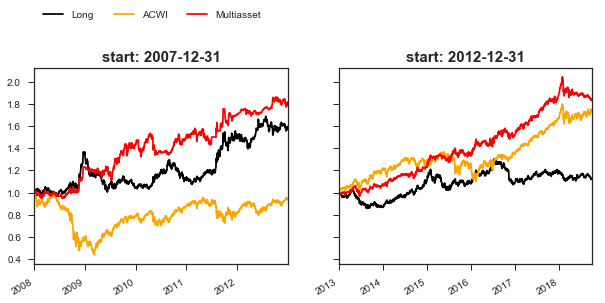

In [5]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

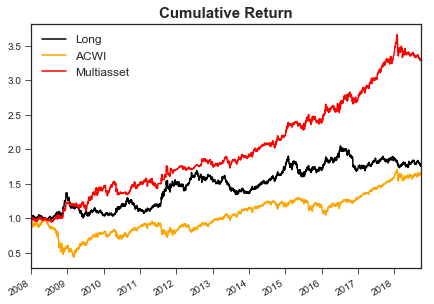

In [5]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum(strats, names=names, color=color, logy=False)

In [1053]:
rt = gmm.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2009-04-30   -0.058353
2010-05-31   -0.084360
2018-02-28   -0.051543
Name: DualMomentum, dtype: float64

In [6]:
gmm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
USD_DOWN,0.79,2708,-2.20,8.60,-0.26,-31.61,-1.40,8.40,-0.19,0.16,59.98,50.00,0.86,58.05
BND_DevHY_loc,1.84,2331,6.77,11.02,0.61,-24.07,6.67,11.00,0.60,0.31,30.74,55.45,1.26,-22.31
REIT_US_Mort,1.26,2708,2.16,25.17,0.09,-63.89,8.06,15.56,0.52,0.80,32.57,63.28,0.70,-56.77
BND_DevSov_loc,1.20,2708,1.68,8.98,0.19,-15.77,1.51,8.65,0.17,0.07,41.28,56.25,0.94,-17.05
DualMomentum,3.30,2708,11.66,12.31,0.95,-12.79,12.85,11.57,1.06,0.10,0.37,58.59,1.72,97.88


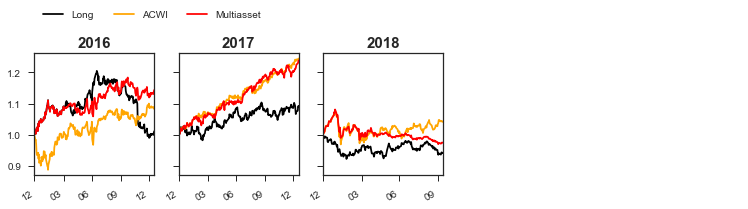

In [1055]:
gmm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

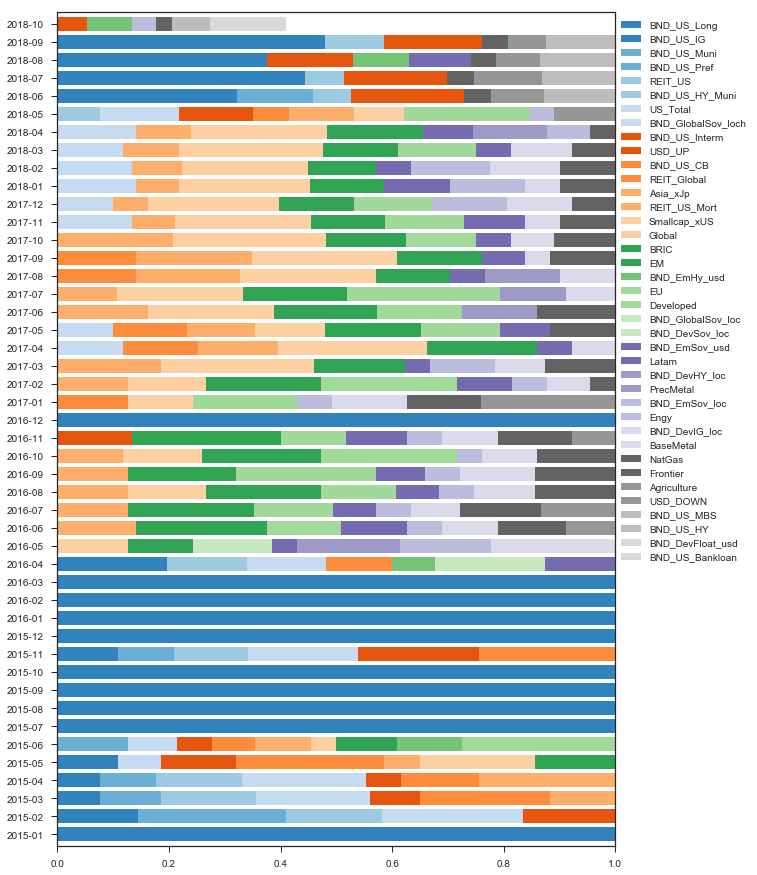

In [1056]:
gmm.plot_weight([2015, 2018])

# Global equity allocation model

In [203]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    #freq='1W', 
    n_picks=1, 
    assets=setting.assets_spy_tlt, 
    sig_w_base=[0,0,0,0,0,0,0,0,0,3,0,0], 
    sig_w_dynamic=False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=None, #(60,250), 
    strong_condition=False, 
    market=None, #'ACWI', 
    supporter='BND_US_Tbill', 
    cash_equiv='BND_US_Tbill', 
    #trade_assets=[('US', {'US_lev':0.5})], 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=1.05, 
    profitake_sigma=30, 
    rentry_sigma=2, 
)


4.695419549942017


In [201]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='sig', #'inv_ranky2', 
    rebal_style='cum', 
    #freq='1W', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    #trade_assets=[('US', {'US_lev':0.5})], 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


11.491933107376099


In [187]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='iv', 
    iv_period=60, 
    rebal_style='cum', 
    #freq='1W', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    #trade_assets=[('US', {'US_lev':0.5})], 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


10.077600002288818


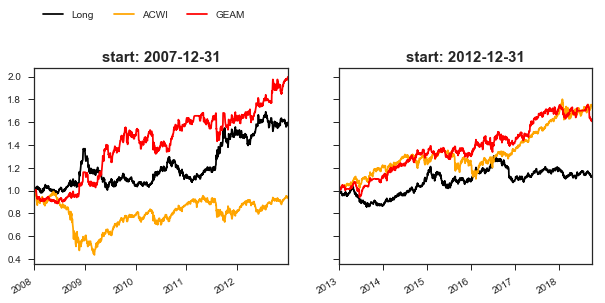

In [98]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

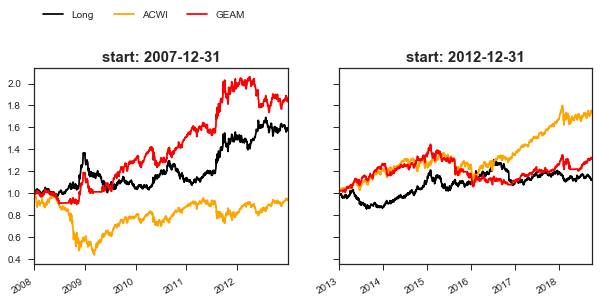

In [211]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

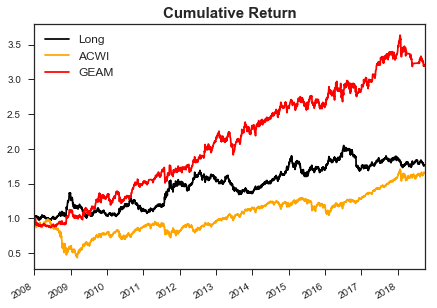

In [5]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

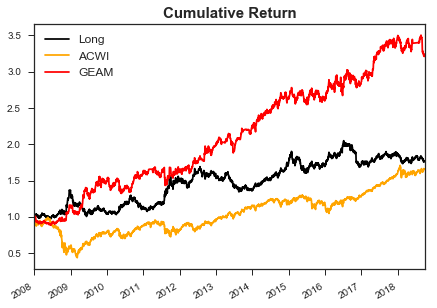

In [100]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

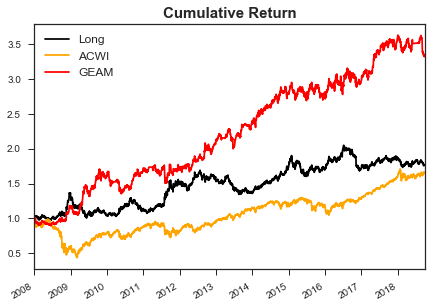

In [113]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [6]:
geam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Japan,1.33,2708,2.66,22.15,0.12,-49.67,6.71,18.13,0.38,0.86,32.41,58.59,0.87,-22.08
Africa,0.63,2708,-4.24,23.22,-0.18,-63.38,4.91,20.13,0.26,0.70,40.71,49.22,0.98,-46.62
Thailand,2.52,2650,9.10,28.24,0.32,-64.22,15.36,22.81,0.77,0.97,25.11,60.00,0.98,63.14
ACWI,1.65,2708,4.76,21.18,0.22,-56.41,11.17,15.53,0.74,1.00,25.05,60.94,0.87,24.29
DualMomentum,3.21,2708,11.36,14.66,0.77,-15.08,13.02,14.20,0.89,0.17,3.29,59.38,1.34,96.04


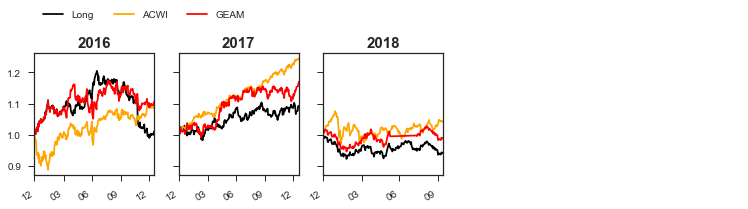

In [193]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

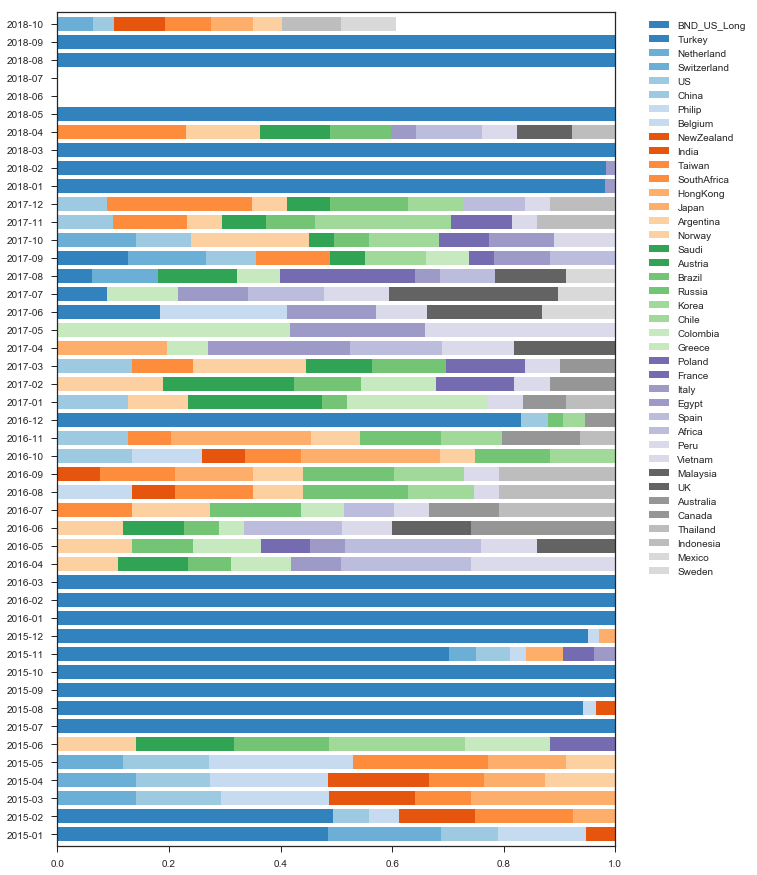

In [224]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [ ]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05,
    profitake_sigma=3, 
    rentry_sigma=2, 
)

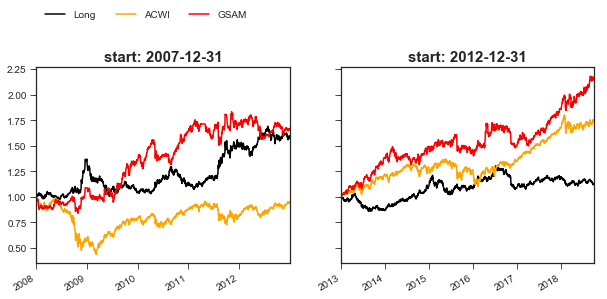

In [12]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

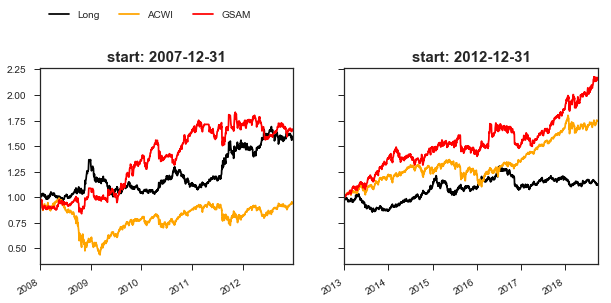

In [13]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

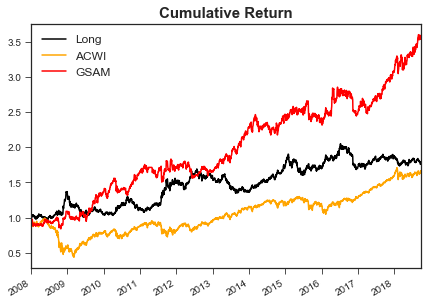

In [13]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [14]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
SilverMiner,0.47,2708,-6.68,44.23,-0.15,-84.03,-12.53,42.63,-0.34,0.99,60.02,45.31,1.30,3.18
ConsumerService,3.85,2708,13.27,19.21,0.69,-46.36,17.41,14.38,1.32,0.79,10.61,64.06,1.11,82.58
Exploration,0.92,2708,-0.77,39.23,-0.02,-71.05,4.95,31.72,0.14,1.38,43.19,51.56,1.05,-0.25
PE,1.13,2708,1.16,30.15,0.04,-81.25,11.89,17.76,0.71,1.21,29.20,60.94,0.77,-90.23
DualMomentum,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23


In [72]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BDC,1.39,1449,5.86,12.12,0.48,-25.27,2.18,11.35,0.20,0.56,41.17,60.29,1.00,49.16
Insurance,2.41,1449,16.37,13.26,1.23,-15.22,11.84,13.11,0.91,0.83,2.00,70.59,1.17,81.53
Broker,2.86,1449,19.87,17.99,1.10,-26.23,21.25,17.15,1.28,1.09,15.17,67.65,1.23,71.42
OnlineRetail,3.45,1449,23.82,15.54,1.53,-22.40,18.08,14.66,1.28,0.90,7.83,72.06,1.43,86.22
DualMomentum,2.11,1449,13.73,13.37,1.03,-13.89,8.54,13.21,0.63,0.64,15.50,66.18,1.30,65.70


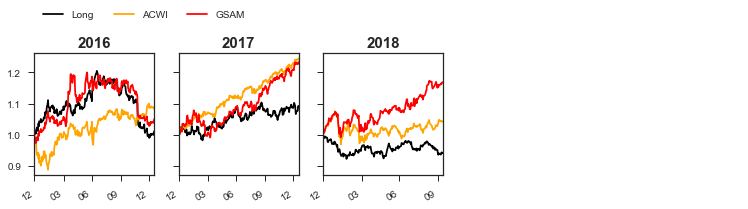

In [201]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

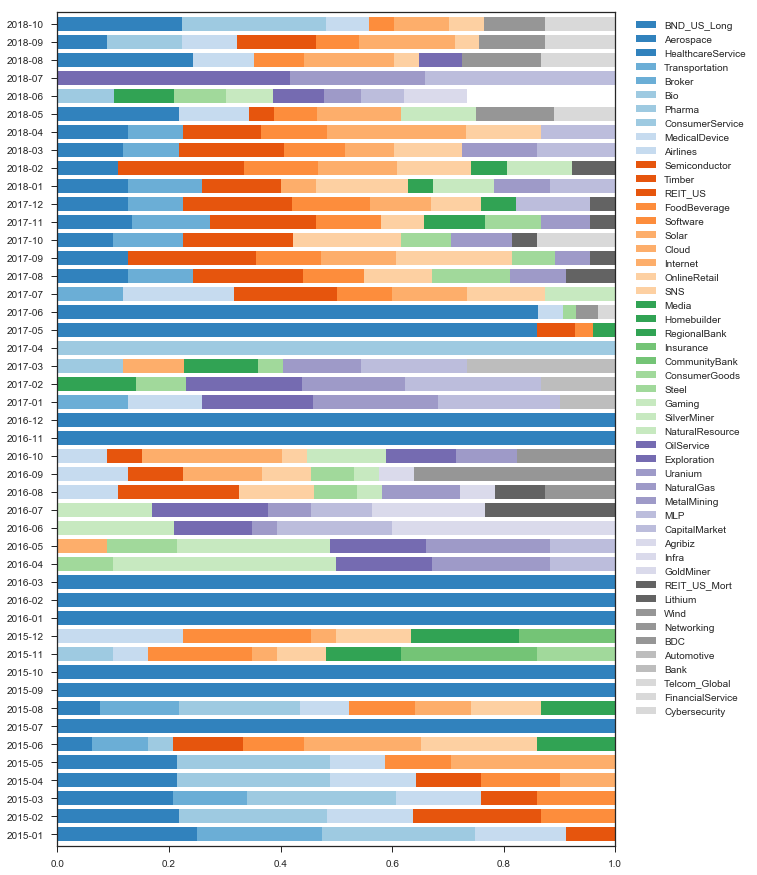

In [202]:
gsam.plot_weight([2015, 2018])

# Global bond allocation model

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
gbam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_thres=0.1, 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(60,250), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='BND_US_Interm', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='ACWI', 
    cash_equiv='BND_US_Long', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=1.05, 
    profitake_sigma=30,
    rentry_sigma=2, 
)


6.38040018081665


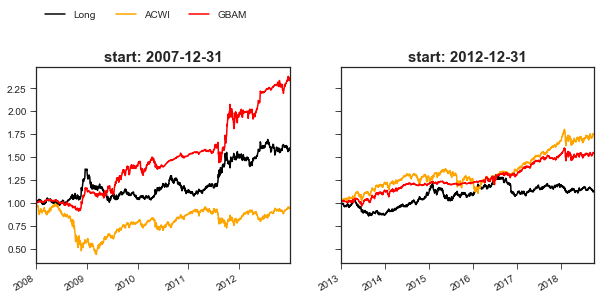

In [17]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

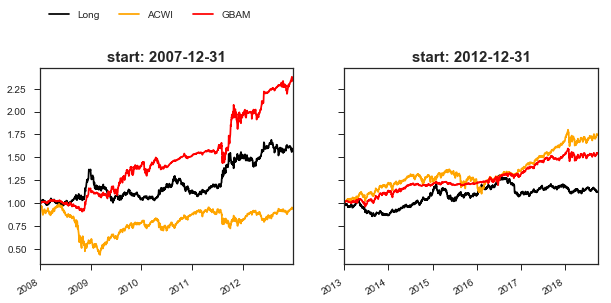

In [17]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

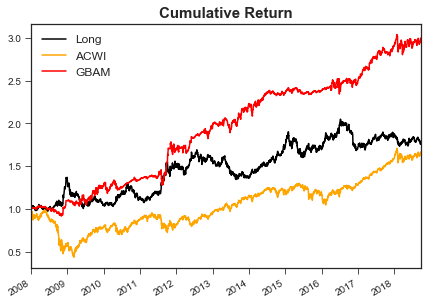

In [77]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum(strats, names=names, color=color, logy=False)

In [18]:
gbam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_HY,1.78,2708,5.49,12.12,0.45,-34.20,6.54,6.77,0.98,0.38,17.93,67.19,0.81,82.71
BND_US_Bankloan,1.55,2708,4.15,4.90,0.85,-32.43,3.52,3.29,1.62,0.07,17.08,64.06,1.01,77.23
BND_DevSov_loc,1.20,2708,1.68,8.98,0.19,-15.77,1.51,8.65,0.17,0.07,41.28,56.25,0.94,-17.05
ACWI,1.65,2708,4.76,21.18,0.22,-56.41,11.17,15.53,0.74,1.00,25.05,60.94,0.87,24.29
DualMomentum,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16


In [80]:
gbam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Muni,1.13,1449,2.06,3.50,0.59,-9.16,2.44,2.84,0.86,-0.02,20.42,64.71,0.86,78.73
BND_EmHy_usd,1.16,1449,2.56,7.24,0.35,-14.90,4.19,6.78,0.67,0.25,28.92,58.82,0.94,50.87
BND_DevHY_loc,1.13,1449,2.08,9.84,0.21,-24.07,3.29,9.59,0.29,0.21,34.75,51.47,1.19,3.19
BND_GlobalSov_loc,0.94,1449,-1.05,7.04,-0.15,-15.41,-0.21,7.42,-0.03,0.05,50.83,51.47,0.89,-26.31
DualMomentum,1.49,1449,7.12,8.72,0.82,-8.67,8.24,9.02,0.96,0.48,3.67,66.18,1.27,94.05


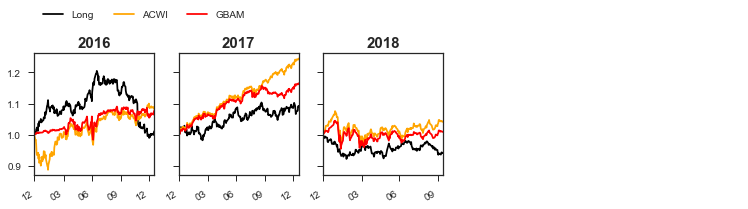

In [209]:
gbam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

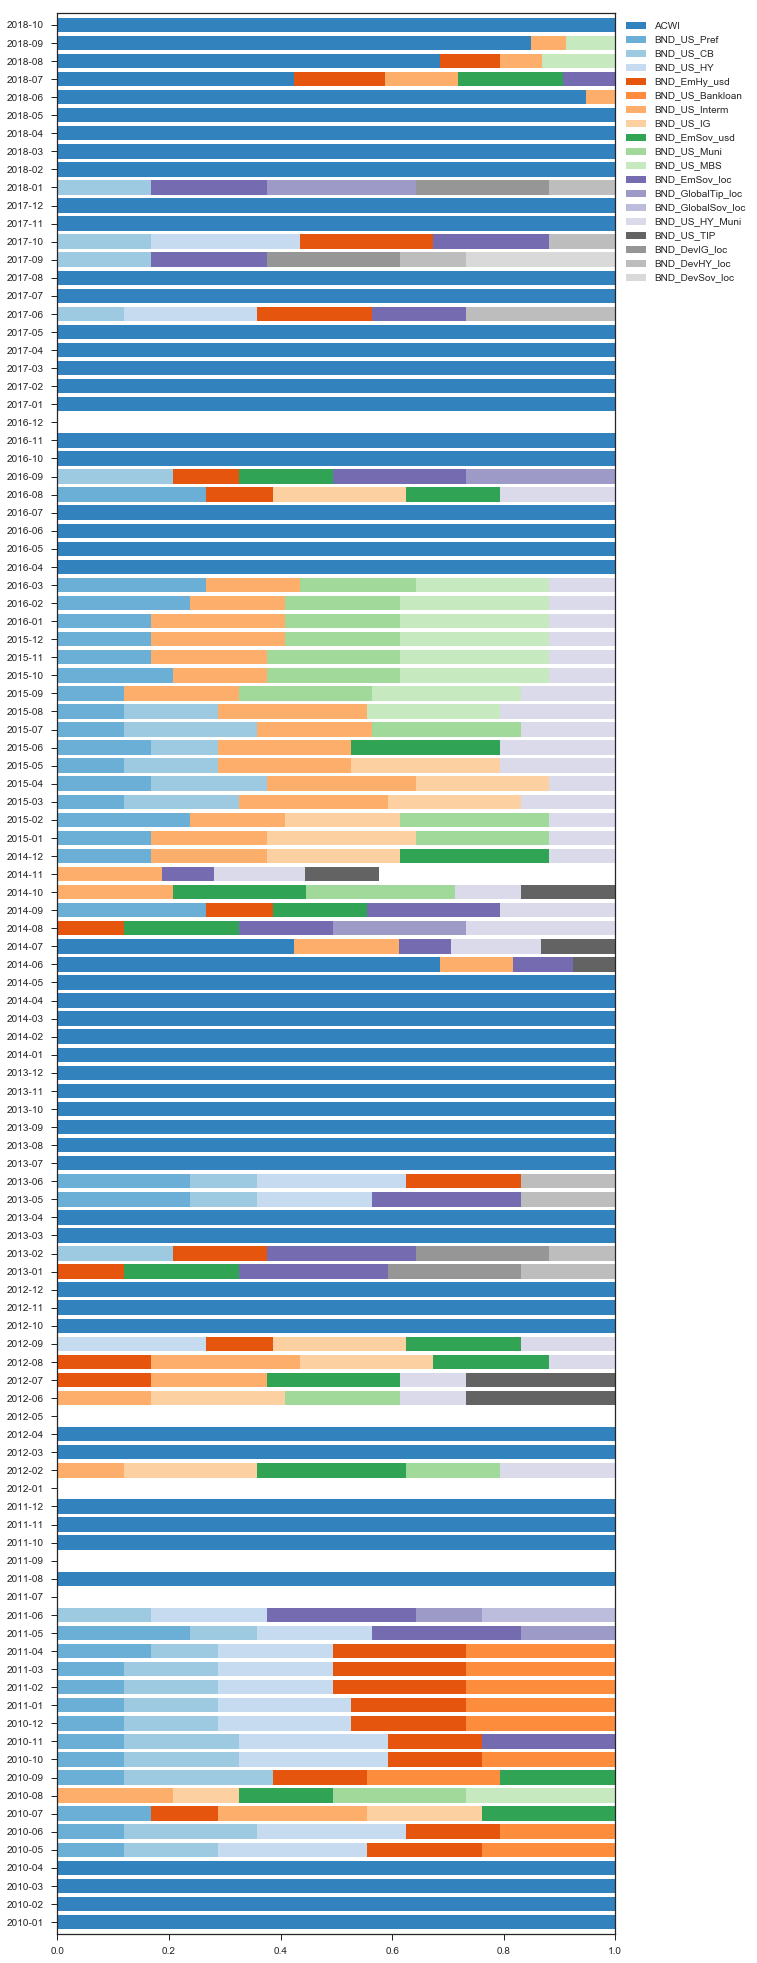

In [210]:
gbam.plot_weight([2010, 2018])

In [902]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [20]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


6.052800178527832


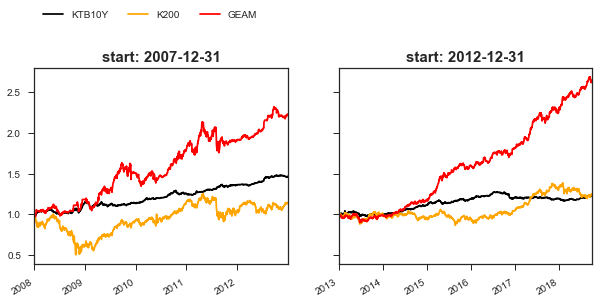

In [332]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

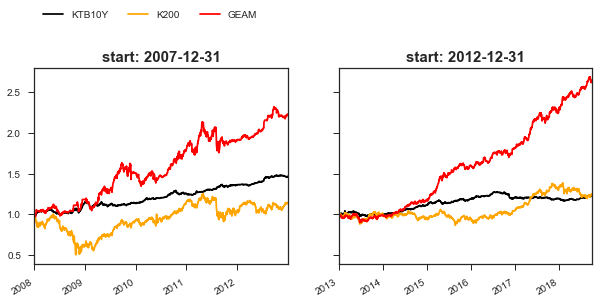

In [21]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

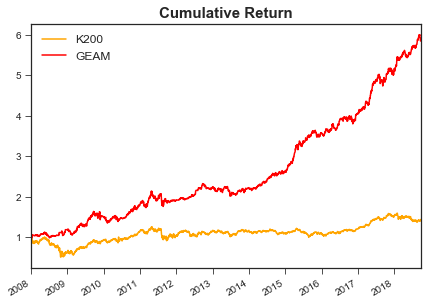

In [34]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)#, start='2009-12-31')

In [22]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
K200L,0.97,2788,-0.26,38.93,-0.01,-77.03,1.25,26.43,0.04,0.55,48.21,56.25,0.91,-74.70
ESG_kr,1.34,1533,4.93,10.77,0.46,-16.82,6.02,10.05,0.59,0.19,36.37,58.57,1.11,49.51
ACWI,1.65,2788,4.62,20.87,0.22,-56.41,10.94,15.37,0.73,1.00,24.62,60.94,0.87,24.27
DvdGrowth_kr,3.40,2399,13.62,14.00,0.97,-20.05,16.90,12.53,1.33,0.20,16.88,59.63,1.48,91.82
DualMomentum,5.90,2788,17.27,12.84,1.34,-17.75,16.69,9.42,1.70,0.07,7.72,73.44,1.10,96.99


In [91]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
KTB10YL,1.36,1491,5.29,8.43,0.63,-18.34,6.69,8.30,0.74,-0.01,43.48,64.71,0.94,61.29
Turnaround_kr,1.75,1491,9.87,15.03,0.66,-26.82,9.57,12.92,0.74,0.26,14.65,58.82,1.22,84.90
ACWI,1.74,1491,9.78,12.39,0.79,-19.43,10.94,11.69,0.92,1.00,17.95,69.12,1.01,77.75
Quality_kr,1.13,1491,2.14,11.86,0.18,-18.48,4.46,11.67,0.39,0.21,31.72,57.35,0.94,51.89
DualMomentum,2.58,1491,17.25,8.43,2.05,-10.66,19.55,8.38,2.45,0.03,0.16,77.94,1.57,92.07


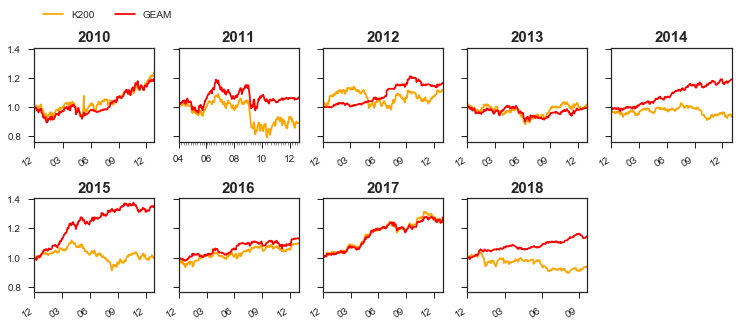

In [335]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

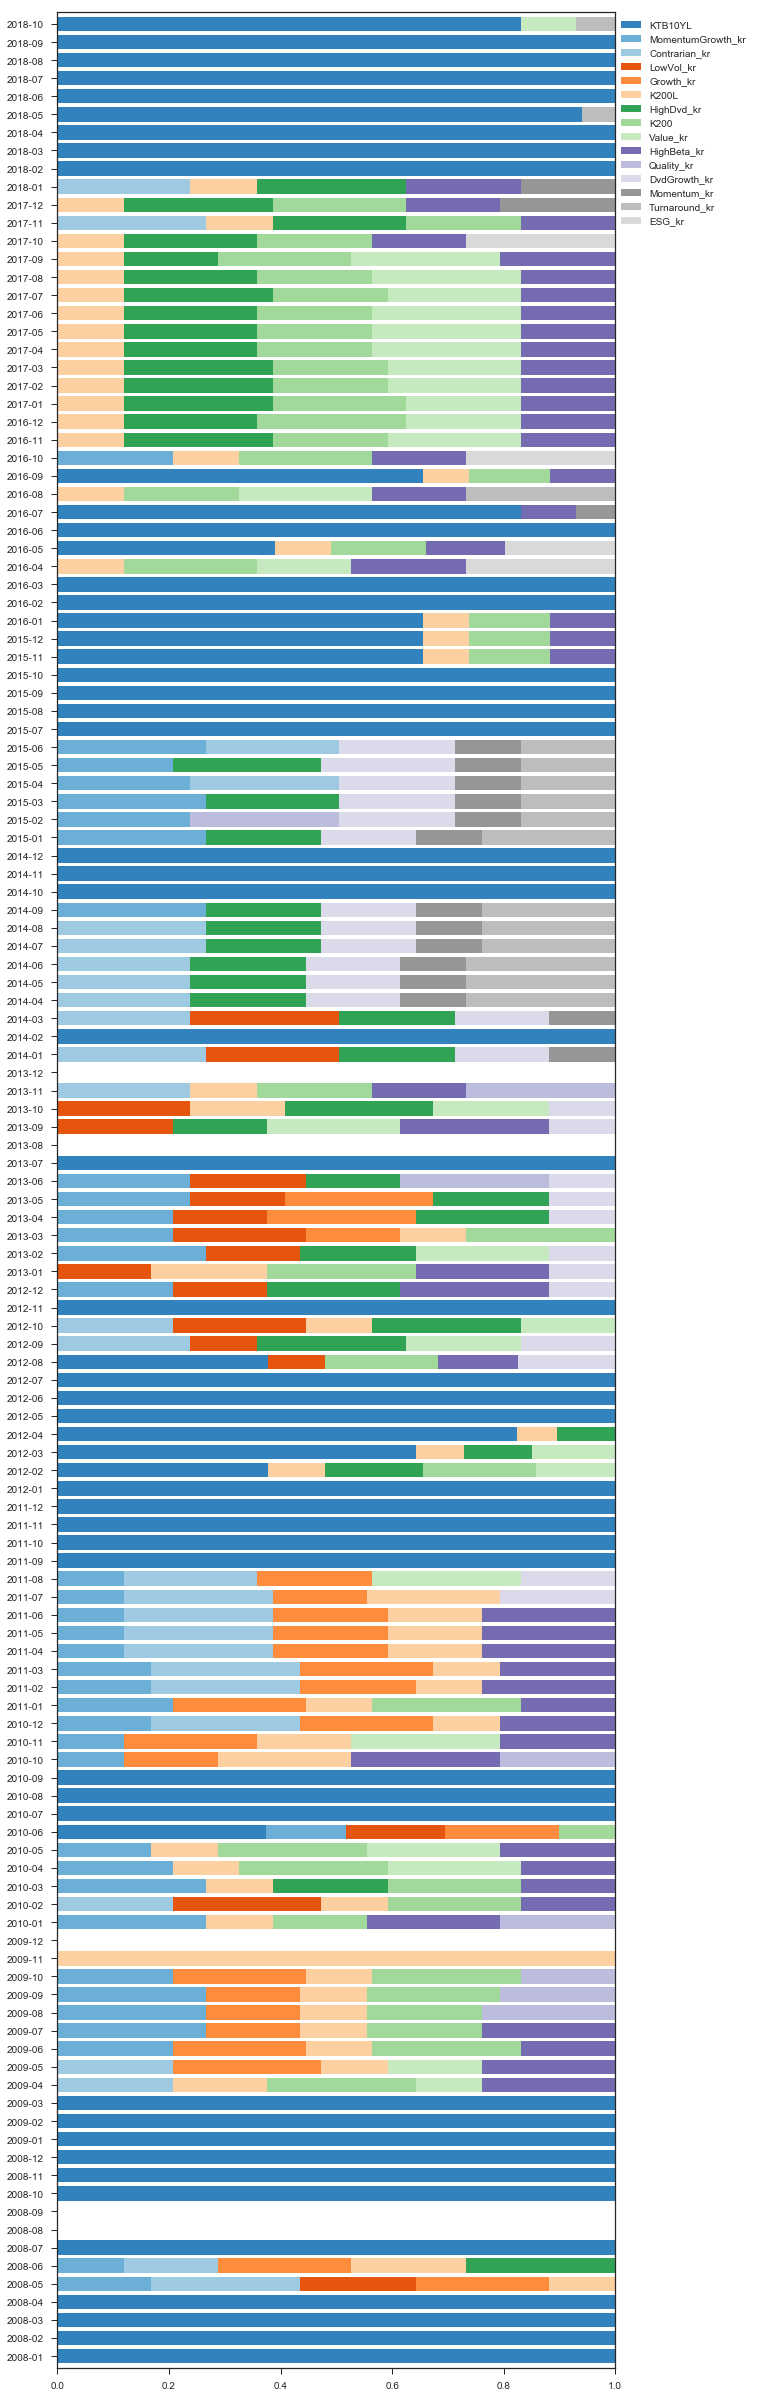

In [336]:
kfam.plot_weight([2003, 2018])

In [344]:
kfam.weight.iloc[-1]

Turnaround_kr        0.070298
HighDvd_kr           0.000000
DvdGrowth_kr         0.000000
Momentum_kr          0.000000
K200                 0.000000
ESG_kr               0.000000
Quality_kr           0.000000
MomentumGrowth_kr    0.000000
Value_kr             0.099416
Contrarian_kr        0.000000
KTB10Y               0.000000
HighBeta_kr          0.000000
LowVol_kr            0.000000
Growth_kr            0.000000
KTB10YL              0.830286
K200L                0.000000
Name: 2018-09-28 00:00:00, dtype: float64

# US multiasset model

In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
umm = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=10, 
    assets=setting.assets_us_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.532926559448242


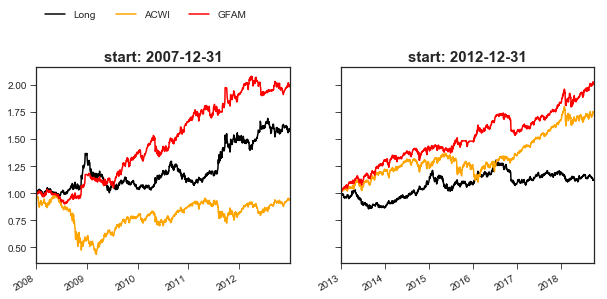

In [143]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

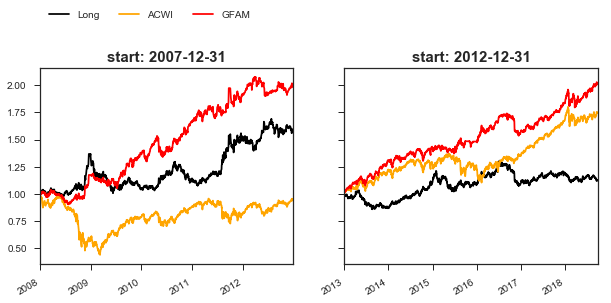

In [25]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

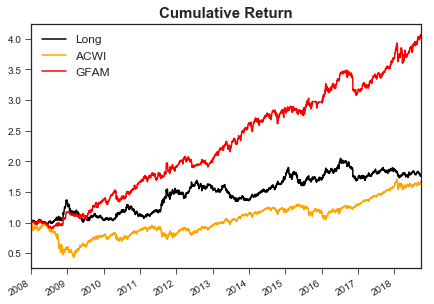

In [144]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum(strats, names=names, color=color, logy=False)

In [26]:
umm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
SmallCap,2.59,2708,9.18,24.58,0.37,-54.26,14.73,17.46,0.83,1.02,20.86,63.28,0.90,68.10
USD_DOWN,0.79,2708,-2.20,8.60,-0.26,-31.61,-1.40,8.40,-0.19,0.16,59.98,50.00,0.86,58.05
M&A,1.28,2708,2.31,8.75,0.26,-21.25,3.09,7.65,0.44,0.20,26.51,59.38,0.96,55.50
Gender,3.40,2079,15.85,14.84,1.07,-20.76,15.34,12.26,1.29,0.89,9.51,71.43,1.13,92.75
DualMomentum,4.04,2708,13.75,12.38,1.11,-12.88,15.22,11.26,1.22,0.11,2.68,66.41,1.36,96.49


In [97]:
umm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_HY,1.26,1449,4.10,5.98,0.69,-13.44,4.09,6.05,0.78,0.33,22.25,70.59,0.81,74.52
BND_US_Muni,1.13,1449,2.06,3.50,0.59,-9.16,2.44,2.84,0.86,-0.02,20.42,64.71,0.86,78.73
M&A,1.29,1449,4.45,5.84,0.76,-5.78,4.80,5.70,0.75,0.18,7.75,66.18,1.25,90.33
Insider,2.78,1449,19.31,13.52,1.43,-14.08,14.53,12.60,1.22,0.90,4.92,64.71,2.05,56.96
DualMomentum,1.90,1449,11.67,10.15,1.15,-11.26,11.40,10.35,1.07,0.42,6.83,67.65,1.45,84.29


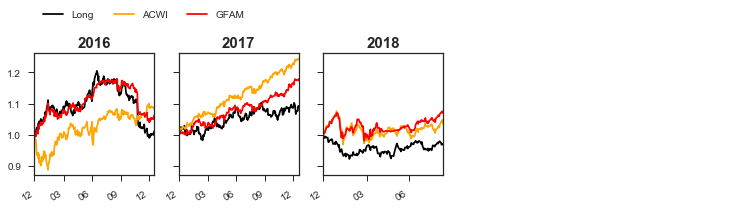

In [1007]:
umm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

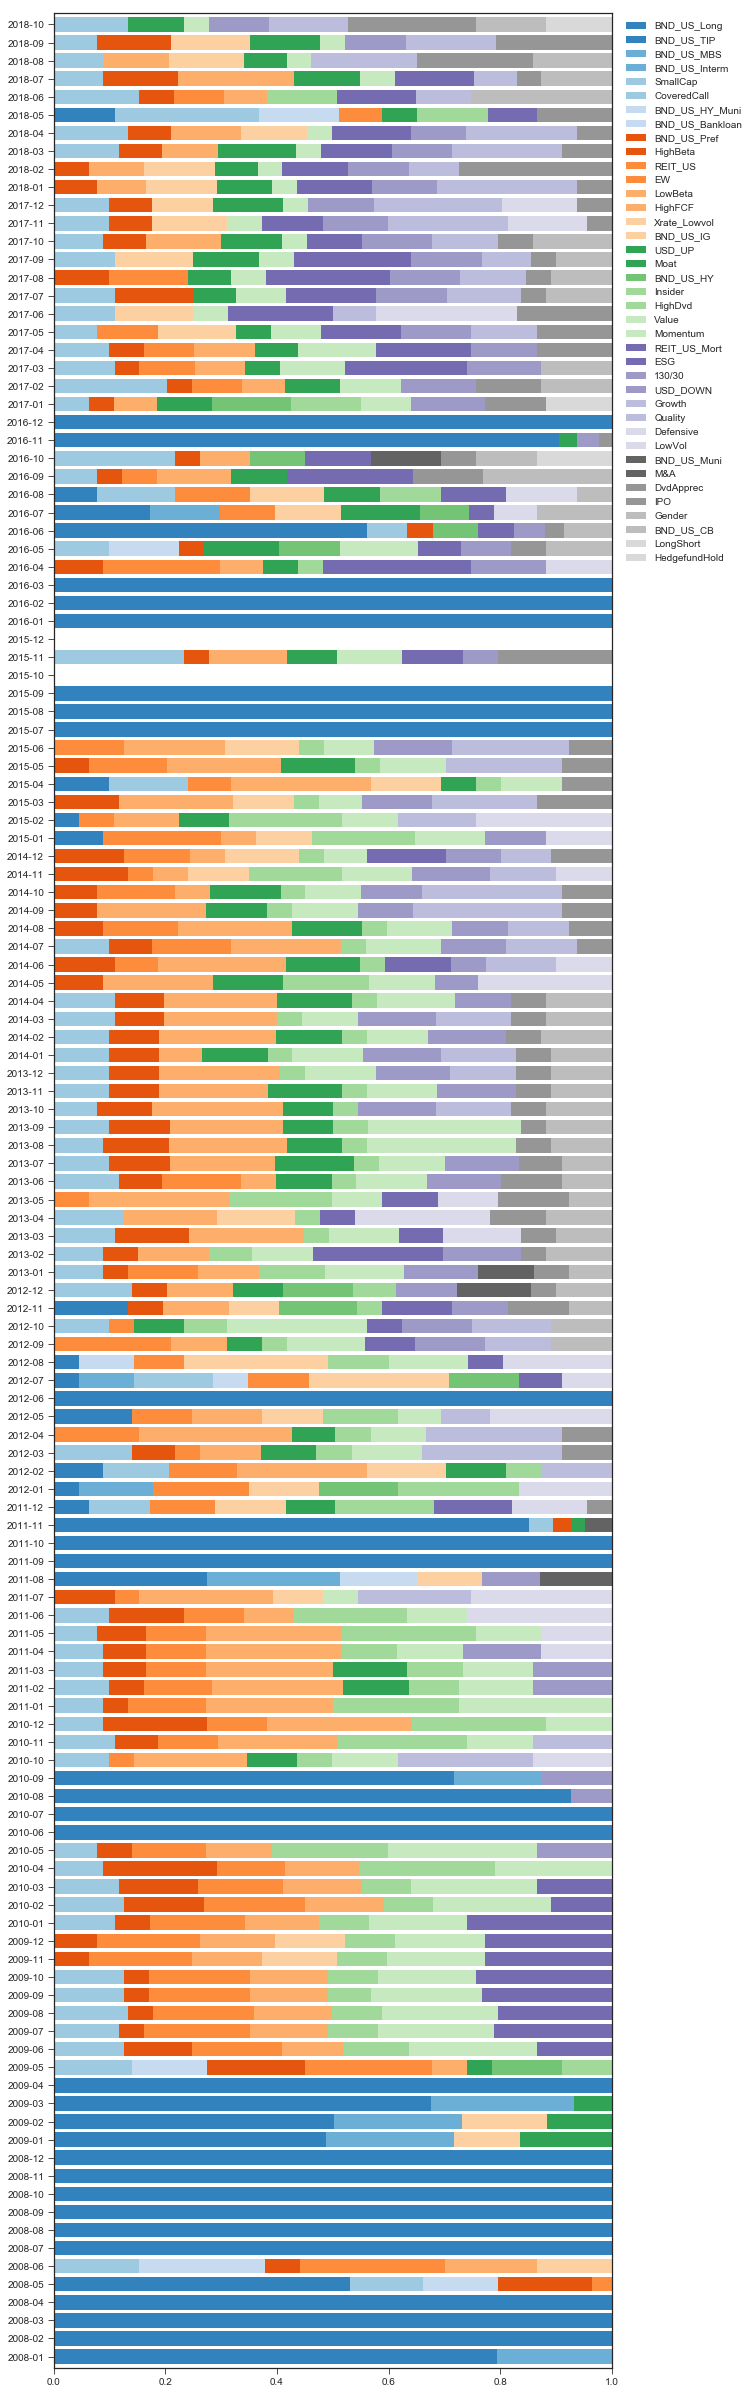

In [146]:
umm.plot_weight([2003, 2018])

# Alternatives allocation model

In [1267]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
aam = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_alt, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_TIP', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


7.082172870635986


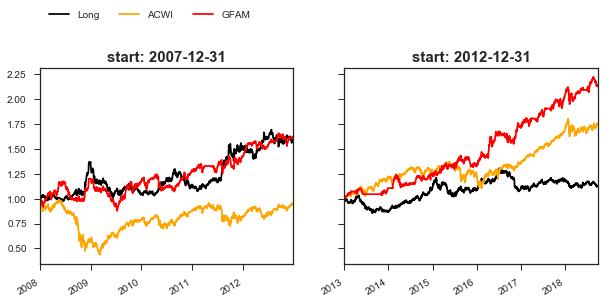

In [28]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

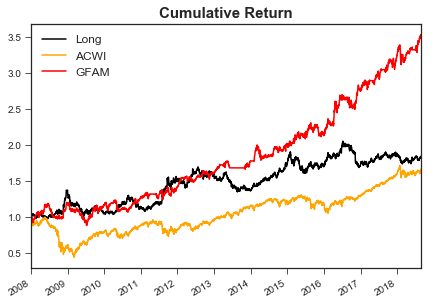

In [45]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum(strats, names=names, color=color, logy=False)

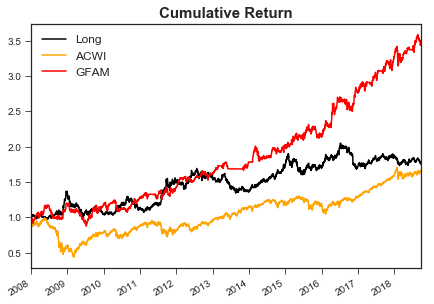

In [150]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum(strats, names=names, color=color, logy=False)

In [29]:
aam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Gender,3.40,2079,15.85,14.84,1.07,-20.76,15.34,12.26,1.29,0.89,9.51,71.43,1.13,92.75
MLP,1.68,2708,4.90,23.30,0.21,-53.06,7.95,15.10,0.61,0.63,32.13,58.59,0.97,48.71
PE,1.13,2708,1.16,30.15,0.04,-81.25,11.89,17.76,0.71,1.21,29.20,60.94,0.77,-90.23
ACWI,1.65,2708,4.76,21.18,0.22,-56.41,11.17,15.53,0.74,1.00,25.05,60.94,0.87,24.29
DualMomentum,3.45,2708,12.11,13.82,0.88,-26.66,13.42,13.02,1.10,0.16,3.50,59.38,1.44,95.32


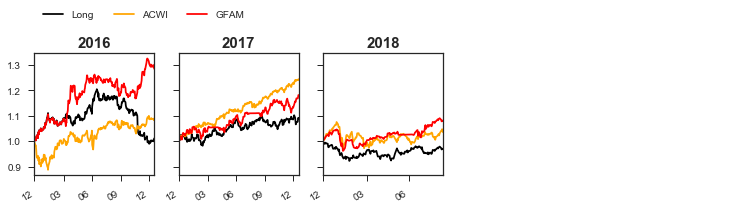

In [1274]:
aam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

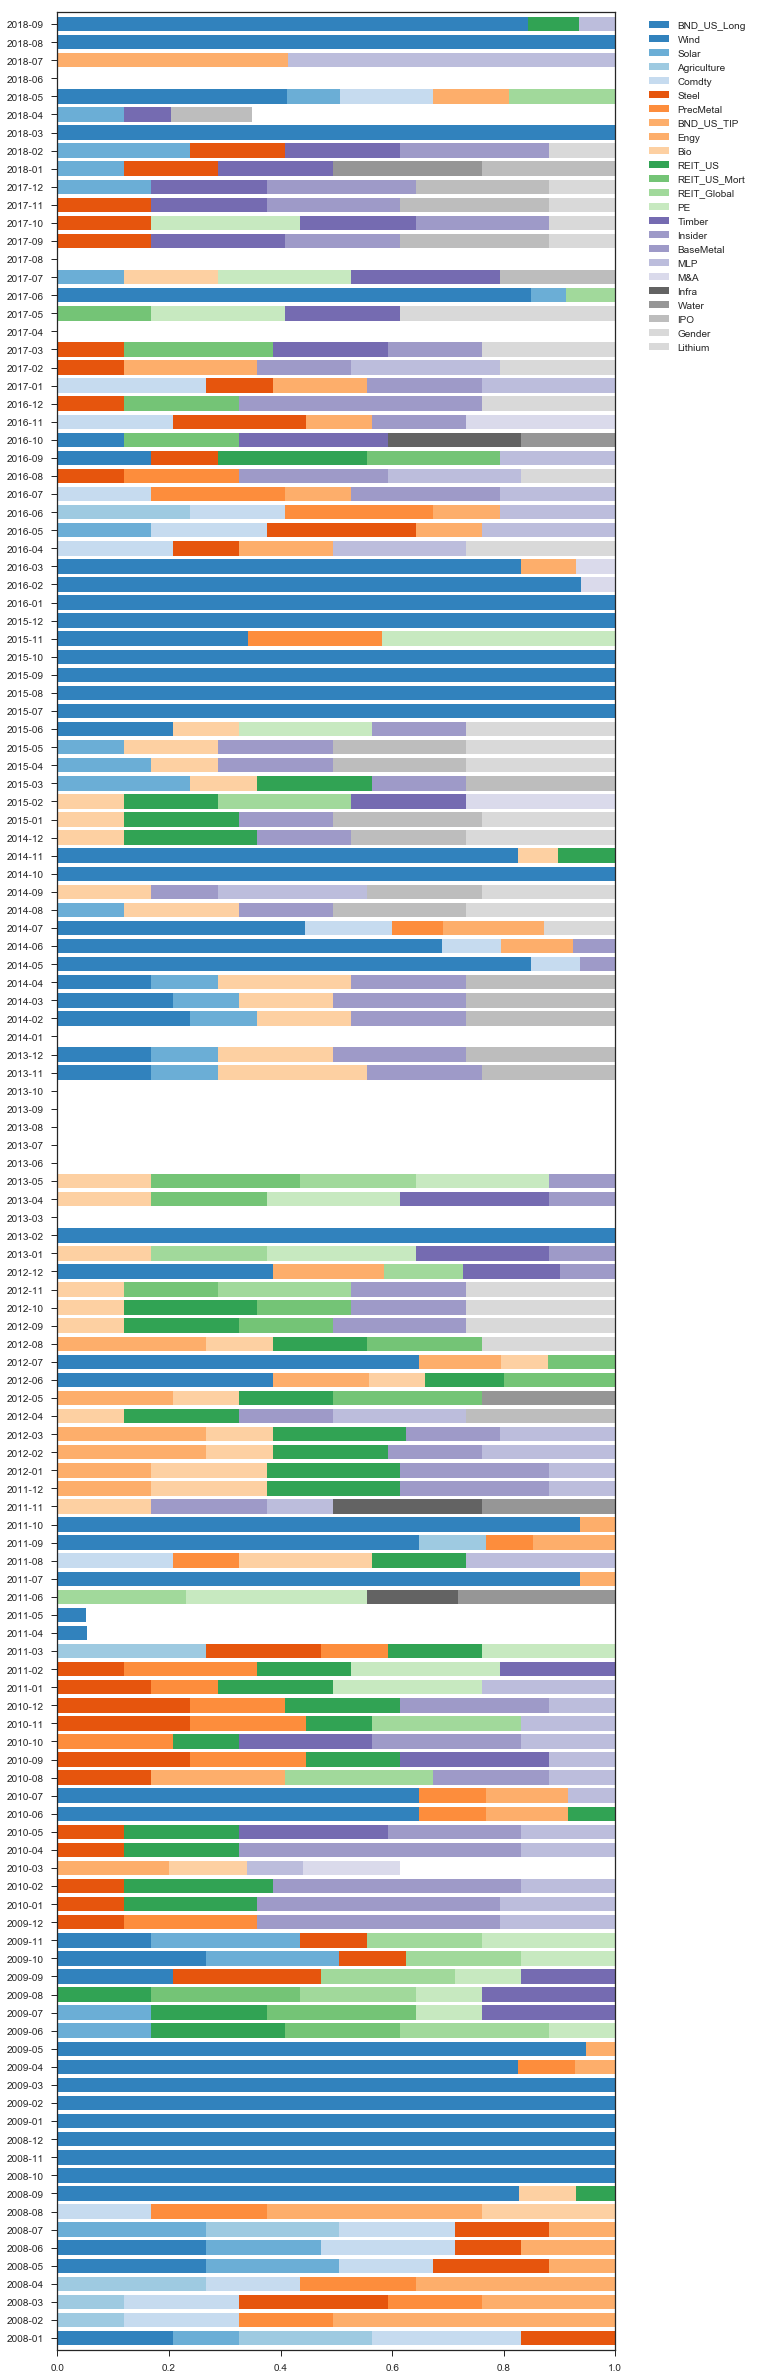

In [1275]:
aam.plot_weight([2003, 2018])

In [139]:
aam.cum.DualMomentum.pct_change()

2007-12-31         NaN
2008-01-02   -0.000990
2008-01-03    0.008404
2008-01-04   -0.013292
2008-01-07   -0.024981
2008-01-08    0.004965
2008-01-09   -0.008953
2008-01-10   -0.002489
2008-01-11    0.013196
2008-01-14    0.008311
2008-01-15   -0.015949
2008-01-16   -0.018732
2008-01-17   -0.013137
2008-01-18   -0.001026
2008-01-22   -0.013809
2008-01-23   -0.008927
2008-01-24    0.026543
2008-01-25    0.012677
2008-01-28    0.002975
2008-01-29    0.006806
2008-01-30   -0.003495
2008-01-31    0.002214
2008-02-01    0.007564
2008-02-04    0.005485
2008-02-05   -0.007043
2008-02-06    0.000114
2008-02-07    0.002723
2008-02-08    0.022843
2008-02-11    0.009836
2008-02-12   -0.010709
                ...   
2018-07-23    0.002181
2018-07-24    0.000618
2018-07-25    0.006019
2018-07-26    0.003488
2018-07-27   -0.006129
2018-07-30    0.004837
2018-07-31    0.001649
2018-08-01   -0.003080
2018-08-02    0.000605
2018-08-03    0.002099
2018-08-06    0.000248
2018-08-07   -0.002201
2018-08-08 

In [103]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
mix = q_base.BacktestComparator(setting.base_params(db), gmm=gmm, umm=umm, gsam=gsam, gbam=gbam, kfam=kfam, aam=aam)#, geam=geam)
mix.mix('sharpe_parity')
#mix.mix('semi_sharpe_parity', w_min=0.1)

In [ ]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix_geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

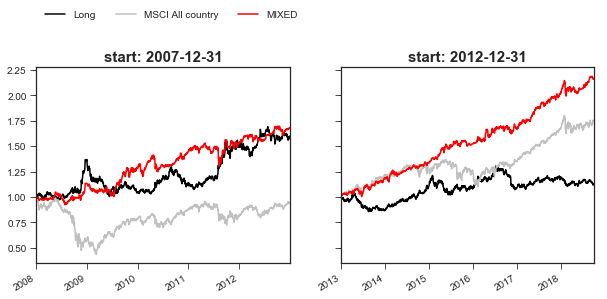

In [72]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

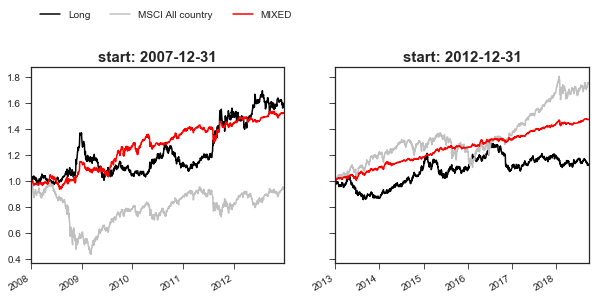

In [91]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

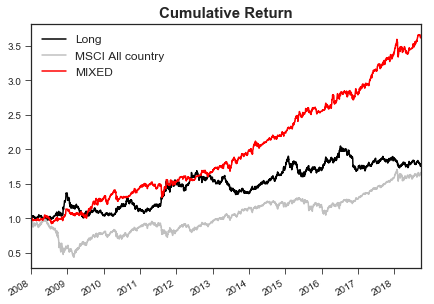

In [74]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)#, start='2010-12-31')

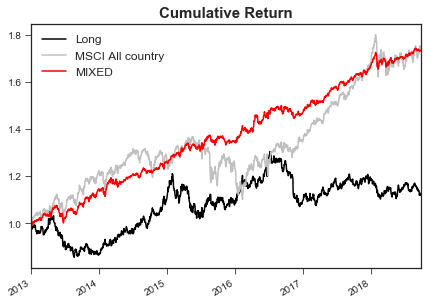

In [11]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

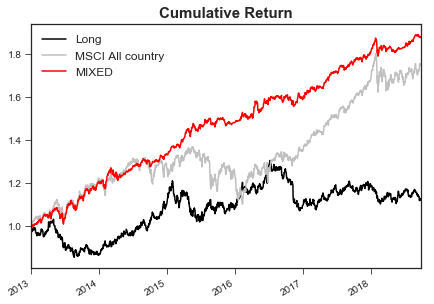

In [79]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

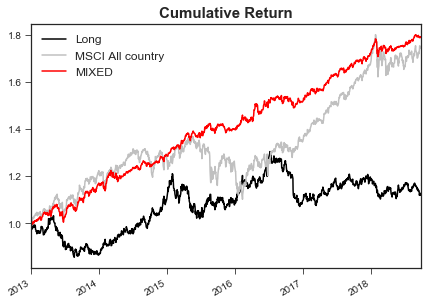

In [89]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

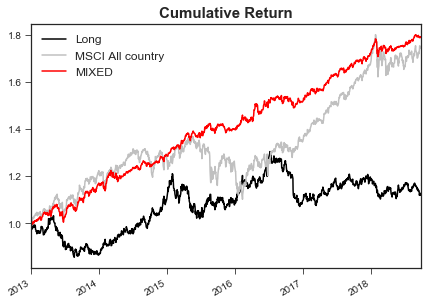

In [102]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

In [82]:
mix.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gsam,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23
gbam,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16
kfam,5.90,2708,17.82,13.12,1.36,-17.75,17.59,9.59,1.74,0.07,7.12,73.44,1.08,97.01
aam,3.49,2708,12.24,13.82,0.89,-26.54,13.27,13.02,1.10,0.16,3.74,59.38,1.43,95.09
mixed,3.64,2708,12.67,10.91,1.16,-14.77,13.16,9.17,1.37,0.17,0.00,68.75,1.25,98.47


In [28]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.74,1449,9.99,5.92,1.69,-6.92,9.99,5.83,1.70,0.28,0.00,72.06,1.57,97.89


In [78]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.88,1449,11.52,6.37,1.81,-7.09,10.80,5.51,1.83,0.28,0.00,75.00,1.52,93.91


In [110]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.88,1449,11.52,6.37,1.81,-7.09,10.80,5.51,1.83,0.28,0.00,75.00,1.52,93.91


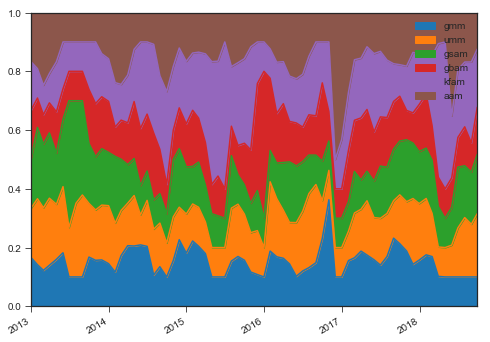

In [108]:
alloc = mix.alloc
xlim = (alloc.index[0], alloc.index[-1])
ax = alloc.plot.area(figsize=(8,6), xlim=xlim, ylim=(0,1), legend=True)#, color=['orange','gold','pink','brown'])
#ax.legend(['AAM','GEAM','GFAM','KFAM'], bbox_to_anchor=(0,1,1,0), ncol=5, loc=3, fontsize=13)

In [112]:
mix.cum.mixed.rolling(250).apply(lambda x: x[-1]-x[0], raw=True).median()

0.14724024094631516

In [91]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

Series([], Freq: M, Name: mixed, dtype: float64)

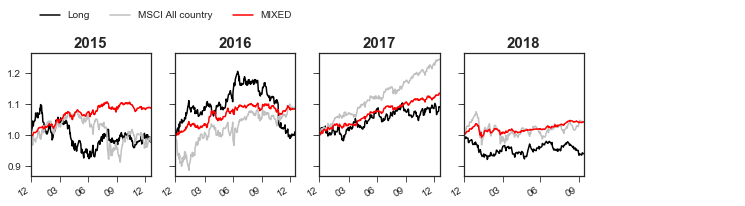

In [90]:
mix.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2015))

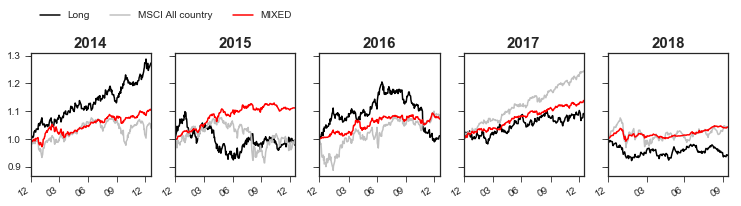

In [114]:
mix.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2014))

In [114]:
pd.Series([1,2,3]).to_frame().rank()[0]

0    1.0
1    2.0
2    3.0
Name: 0, dtype: float64

In [ ]:
bts = {}
for asset in setting.assets_global_eq:
    assets = {asset} | {'REIT_Global'}
    
    bt = q.Backtester(
        setting.base_params(db), 
        w_type='ew', 
        #iv_period=60, 
        rebal_style='cum', 
        #freq='1W', 
        n_picks=1, 
        assets=assets, 
        sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
        sig_w_dynamic=False, 
        sig_dyn_fwd=21*np.array([1]), 
        #sig_dyn_m_backs=24, 
        follow_trend=None, #(20,60), 
        follow_trend_market=(20,60), 
        follow_trend_supporter=(60,250), 
        strong_condition=True, 
        market=None, #'ACWI', 
        supporter='BND_US_Long', 
        cash_equiv='BND_US_Tbill', 
        #trade_assets=[('US', {'US_lev':0.5})], 
        start='2007-12-31', 
        end='2018-09-30', 
        losscut=1.05, 
        profitake_sigma=30, 
        rentry_sigma=2, 
    )
    bts[asset+'1'] = bt